In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import h5py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import scipy.constants as cs
plt.style.use('bold')
plt.style.use('presentation')

from scipy.ndimage import gaussian_filter
from scipy.signal import savgol_filter
from shabanipy.resonators.notch_geometry import fit_complex
from shabanipy.resonators.timedomain_analysis import histogram_iq
from shabanipy.plotting import jy_pink
jy_pink.register()

#: Name of the sample that must appear in the measurement name usually of the form "{Wafer}-{Piece}_{Design}-{Iteration}_{Junction}_{Cooldown}"
SAMPLE_ID = "JS626-4SQ-1-001-CD3"

#: hdf5 file number 
FILE_NUM = '055'

#: Path to store generated files
PATH = (f"/Users/bh/Desktop/Code/Topological JJ/Samples/{SAMPLE_ID}")

#: Name of generated processed data file
RAW_DATA_NAME = (f"{PATH}/Data/{SAMPLE_ID}_aggregated-data-{FILE_NUM}.hdf5")

h = h5py.File(RAW_DATA_NAME, 'r')

vg = 'RS2A::0&RS2B::0&RS3A::-6&RS3B::-6&RS4A::0&RS4B::0'

f = h['Data'][f'{vg}']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
i = np.array(f["I"])
q = np.array(f["Q"])
time = np.arange(0,int(i.shape[0])*0.5e-9,0.5e-9)

Text(0, 0.5, 'Signal (mV)')

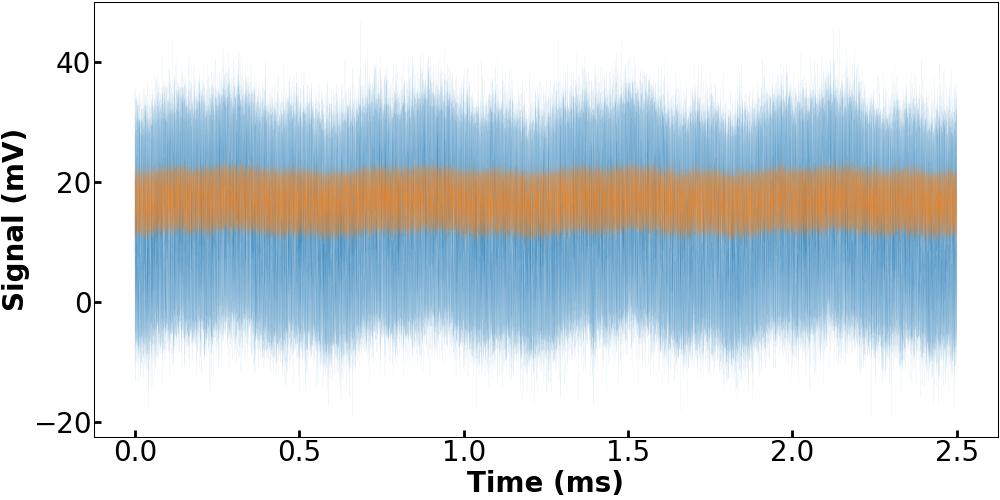

In [35]:
fig, ax = plt.subplots(figsize = (20,10),constrained_layout=True, dpi = 50)
plt.plot(time*1e3,i*1e3, linewidth = 0.05, marker = 'o', markersize = 0)
plt.plot(time*1e3,q*1e3, linewidth = 0.05, marker = 'o', markersize = 0)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Signal (mV)')

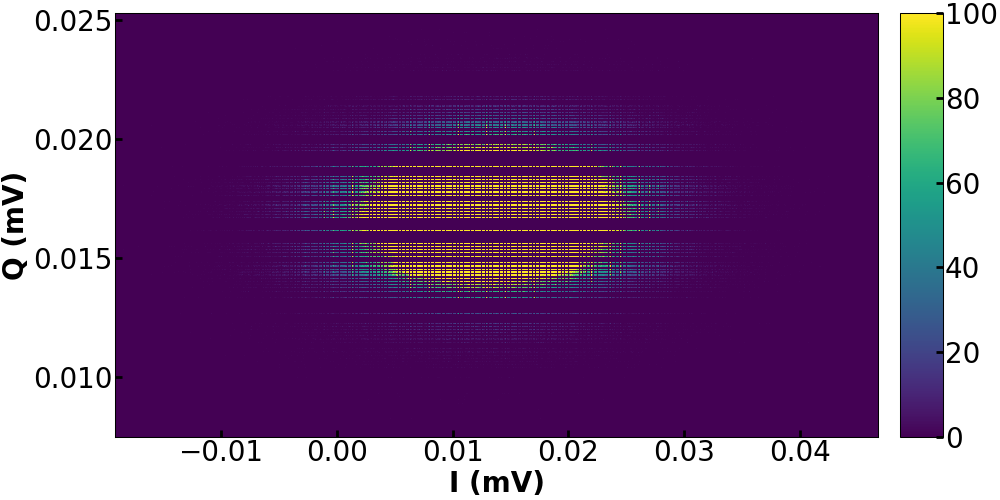

In [42]:
histogram_iq(i,q,bins = (1000,1000), counts_lims = (0,100))

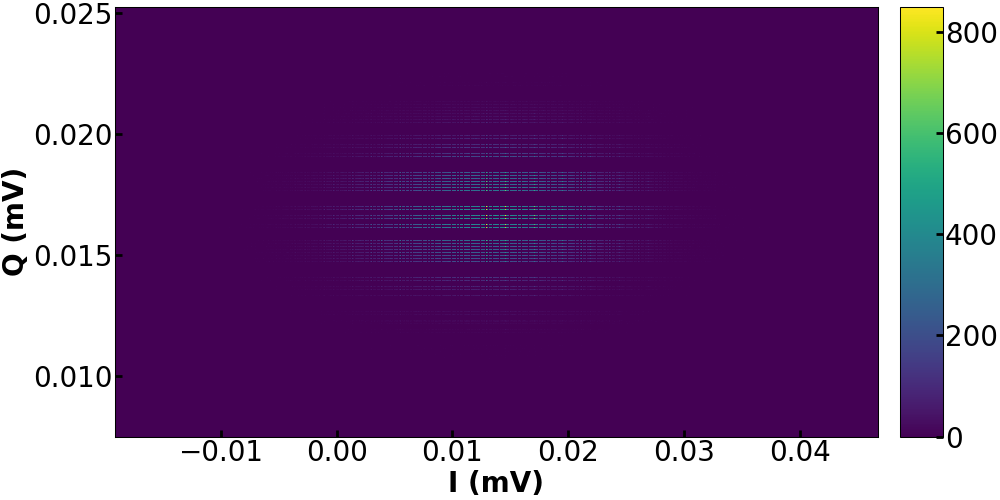

In [38]:
fig, ax = plt.subplots(figsize = (20,10),constrained_layout=True, dpi = 50)
hist = ax.hist2d(i,q, bins = np.array([1000,1000]), vmin = 0, vmax = None)
ax.set_xlabel('I (mV)')
ax.set_ylabel('Q (mV)')
cb = fig.colorbar(hist[3], ax=ax)
# cb.ax.set_xlabel(r'$\mathbf{\frac{dV}{dI} (\Omega)}$', labelpad = 10)
# plt.set_clim(0,50)